In [107]:
import Micrograd
from Micrograd import Value
from Micrograd import draw_dot
import numpy as np

In [108]:
class Module: 
    
    def zero_grad(self):  # Used for changing the gradients back to zero after every backprop iteration
        for p in self.parameters():
            p.grad = 0 
    
    def parameters(self): # Why add this?
        return []

In [109]:
class Neuron(Module):
    
    def __init__(self, nin , nonlin = True):
        self.w = [Value(np.random.uniform(-1,1)) for _ in range (nin)]
        self.b = Value(np.random.uniform(-1,1))
        self.nonlin = nonlin
        
    def __call__(self, x):
        out = sum((wi*xi for wi,xi in zip(self.w,x)), self.b)
        return out
    
    def parameters(self):
        return self.w + [self.b]
    
    def __repr__(self):
        return f' dense neuron with ({len(self.w)+1} parameters)'
    

In [110]:
class Layer(Module):
    def __init__(self, nin , nout , **kwargs):
        self.neurons = [Neuron(nin , **kwargs) for _ in range(nout)]
        
    def __call__(self, x):
        out = [neuron(x) for neuron in self.neurons]
        return out[0] if len(out) == 1 else out # Just to get the single ouput out from the list
        
    def parameters(self):
        return [p for neuron in self.neurons for p in neuron.parameters()]
    
    def __repr__ (self):
        return f' layer of {len(self.neurons)}'

In [121]:
class MLP(Module):
    
    def __init__(self, nin , nouts ,**kwargs):
        size = [nin] + nouts
        self.layers = [Layer(size[i], size[i+1]) for i in range(len(nouts))]
    
    def __call__(self, x):
        for layer in self.layers:
            x = layer(x)
        return x
    
    def parameters(self):
        return [p for layer in self.layers for p in layer.parameters()]
    
    def __repr__ (self):
        return f'layer of {len(self.layers)}'

In [122]:
n = MLP(3 , [4 , 4 , 1])

xs = [[2.0 , 3.0 , 4.0],
      [1.0 , 6.0 , 5.0],
      [5.0 , 4.0 , 7.0]]
ys = [1.0 , -1.0 , 1.0]


In [133]:
# Performing simple gradient descent:

for k in range(100):
    y_pred = [n(x) for x in xs]
    loss = sum((ygt-ypred)**2 for ygt, ypred in zip(ys, y_pred))
    
    n.zero_grad()
        
    loss.backward()
    
    # In gradient descent, gradient is a vector pointed in the direction of increased loss
    for p in n.parameters():
        p.data += -0.001 * p.grad
    
    
    print (k, loss)



0 Value(data=0.01702219291452491, grad=1.0)
1 Value(data=0.01693169238665775, grad=1.0)
2 Value(data=0.016841644041644344, grad=1.0)
3 Value(data=0.016752045842377872, grad=1.0)
4 Value(data=0.0166628957592883, grad=1.0)
5 Value(data=0.01657419177032538, grad=1.0)
6 Value(data=0.016485931860944426, grad=1.0)
7 Value(data=0.016398114024087206, grad=1.0)
8 Value(data=0.01631073626016719, grad=1.0)
9 Value(data=0.016223796577052904, grad=1.0)
10 Value(data=0.016137292990051937, grad=1.0)
11 Value(data=0.016051223521893025, grad=1.0)
12 Value(data=0.015965586202710685, grad=1.0)
13 Value(data=0.015880379070028323, grad=1.0)
14 Value(data=0.01579560016874143, grad=1.0)
15 Value(data=0.015711247551101384, grad=1.0)
16 Value(data=0.01562731927669756, grad=1.0)
17 Value(data=0.015543813412442223, grad=1.0)
18 Value(data=0.015460728032552374, grad=1.0)
19 Value(data=0.01537806121853353, grad=1.0)
20 Value(data=0.015295811059162997, grad=1.0)
21 Value(data=0.015213975650471953, grad=1.0)
22 Valu

In [134]:
y_pred

[Value(data=0.908504102150363, grad=-0.18299179569927393),
 Value(data=-0.971900000776958, grad=0.05619999844608392),
 Value(data=1.0283322824083978, grad=0.056664564816795604)]

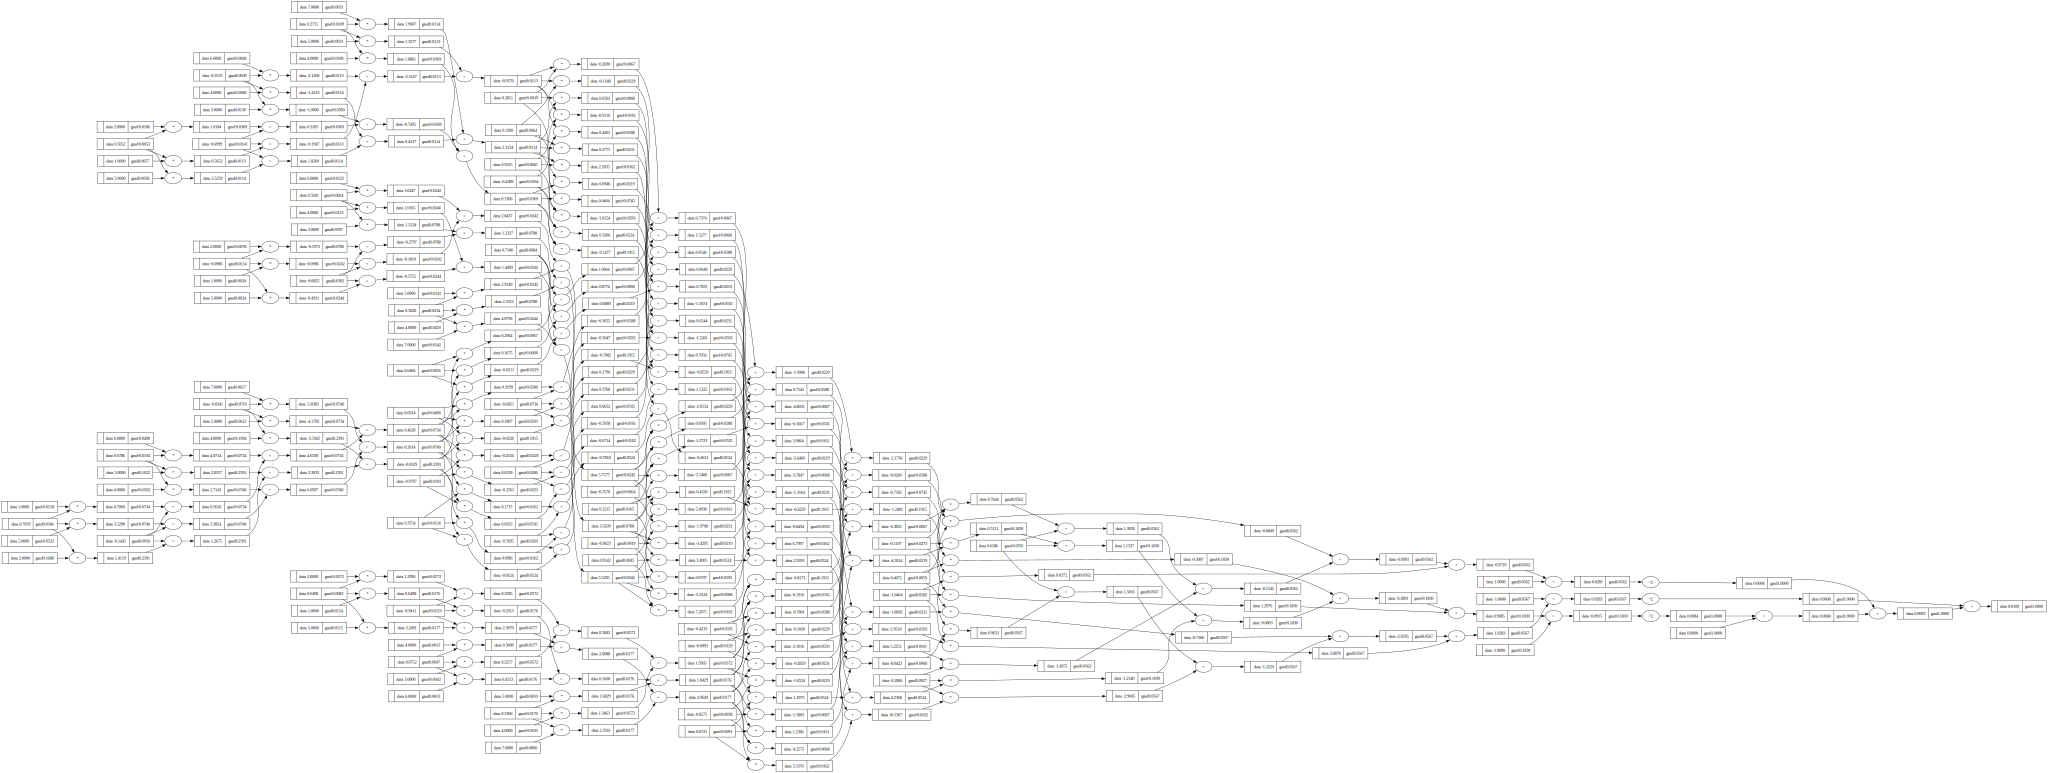

In [135]:
draw_dot(loss)